In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
df = pd.read_csv('../../parallel_energy.csv')

In [168]:
en_0 = df['e_tot'][0]

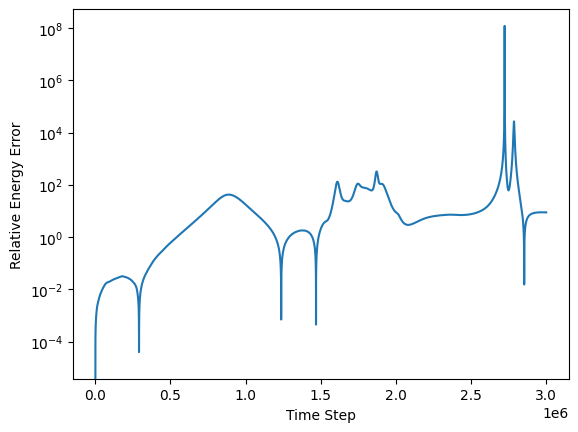

In [169]:
plt.plot(df['t_step'], np.abs((df['e_tot'] - en_0)/en_0))
plt.xlabel('Time Step')
plt.ylabel('Relative Energy Error')
plt.yscale('log')

In [163]:
df = pd.read_csv('../../parallel_output.csv')

In [164]:
N = df['ID'].max()+1

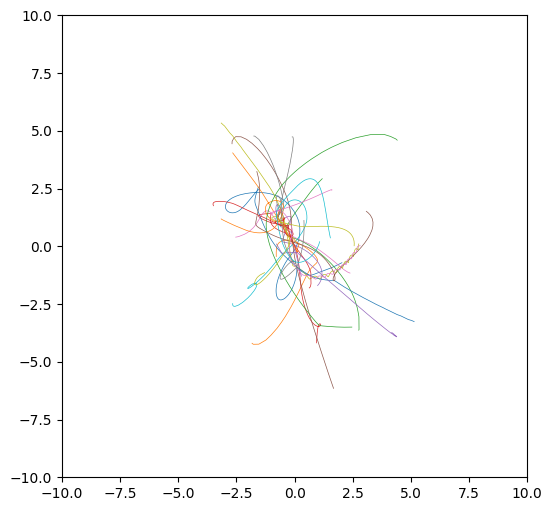

In [166]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

for i in range(N):
    ax.plot(df[df['ID']==i]['pos_x'], df[df['ID']==i]['pos_y'], linewidth=0.5)

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

plt.show()

In [ ]:
import matplotlib.animation as animation
from matplotlib.pyplot import cm

# Create figure and axis
fig, ax = plt.subplots(figsize=(6,6))
color = cm.rainbow(np.linspace(0, 1, N))

# Set axis limits based on previous plot
# ax.set_xlim(-100,50)
# ax.set_ylim(-100,100)

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)

    current_step = frame * 20

    for i, c in enumerate(color):
        current_data = df[(df['t_step'] == current_step) & (df['ID'] == i)]
        ax.scatter(current_data['pos_x'], current_data['pos_y'], s=10, color=c)

# Create animation
max_steps = df[df['ID']==0]['t_step'].max()
frames = max_steps // 20
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50)

# Save as gif
ani.save('movement.gif', writer='pillow')
plt.close()